In [ ]:
### 차원축소
# 고차원 데이터(변수가 많음, 칼럼이 많은)의 경우, 학습이 어려울 수 있다(과적합),
# 연산하는데 비용이 많이 든다.. 시각화 어렵다...

# 고차원 데이터 => 저차원으로 변형..

# 학습이 효율적이다
# 학습에 비용이 적게든다(메모리, 시간)
# 시각화해서 분석이 용이하다

# PCA, LDA, t_sne...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
x = digits.data
y = digits.target

In [8]:
x.shape

(1797, 64)

In [9]:
x[10].reshape(8,8)

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

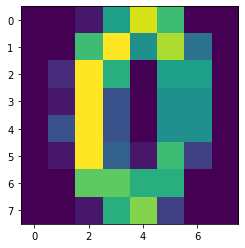

In [10]:
plt.imshow(x[10].reshape(8,8))

In [11]:
y[10]

0

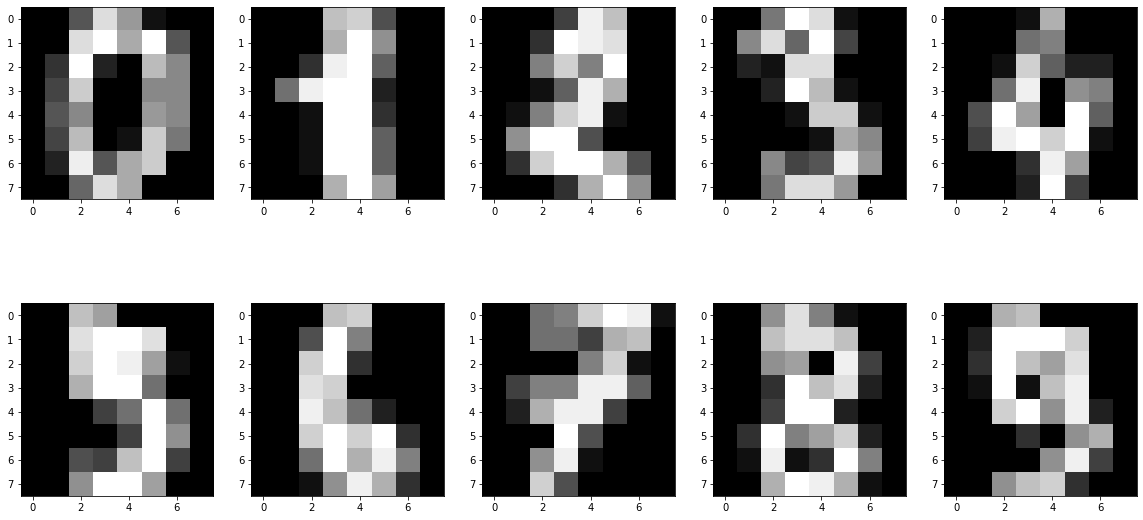

In [18]:
samples = x[:10].reshape(10, 8,8)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    axes[idx//5, idx%5].imshow(sample, cmap='gray')

In [33]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
scaied_x = Scaler.fit_transform(x)

In [28]:
scaled_x

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [29]:
scaled_x.shape

(1797, 64)

In [31]:
from sklearn.decomposition import PCA
pca = PCA()

In [34]:
pca.fit(scaied_x)

PCA()

In [35]:
len(pca.explained_variance_)

64

In [36]:
# 설명된 분산...
# 64차원 데이터 => 64개의 주성분 생성
# 각 주성분이  설명해주는 데이터 분산의 크기..

In [37]:
len(pca.explained_variance_)

64

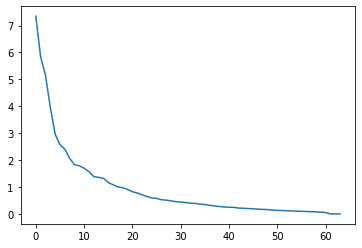

In [45]:
plt.plot(pca.explained_variance_)

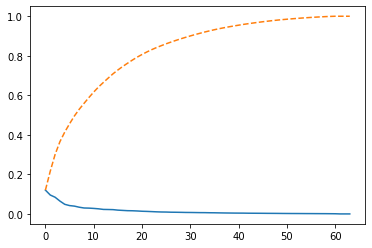

In [44]:
plt.plot(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum(), linestyle='--')

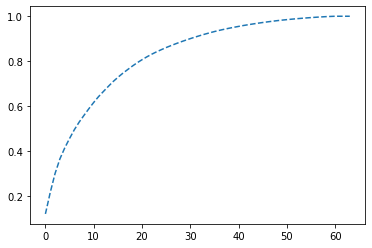

In [ ]:
# 실제 사용 - n개의 주성분..

# 전체 주성분의 값을 사요하지 않음..
# 주성분의 개수를 지정하거나 설명되는 분산의 비율값을 사용함..

In [109]:
# 데이터 분산의 80%까지 표현하는 주성분을 리턴..
ratio_pca = PCA(n_components=0.8)
ratio_pca.fit(scaled_x)

PCA(n_components=0.8)

In [110]:
ratio_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732])

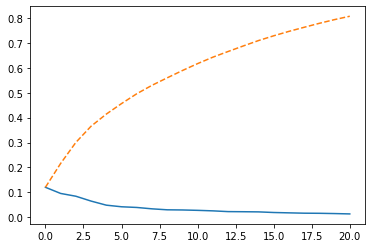

In [52]:
plt.plot(ratio_pca.explained_variance_ratio_)
plt.plot(ratio_pca.explained_variance_ratio_.cumsum(), linestyle='--')

In [111]:
ratio_pca.n_components_

21

In [112]:
# n개의 주성분을 사용..

In [113]:
n_comp_pca = PCA(n_components=8)
n_comp_pca.fit(scaled_x)

PCA(n_components=8)

In [114]:
n_comp_pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444413, 0.06498402, 0.0486007 ,
       0.04213986, 0.03940593, 0.0338908 ])

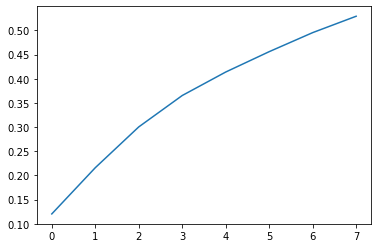

In [115]:
plt.plot(n_comp_pca.explained_variance_ratio_.cumsum())

In [116]:
# 시각화 : 2차원 또는 3차원 데이터 까지 가능..
# 64차원 x 데이터를 2 차원 데이터로 차원을 축소해서 시각화하기..

In [117]:
n_comp_pca = PCA(n_components=2)
viz_pca_latent = n_comp_pca.fit_transform(scaied_x)


In [118]:
def visualize_latent_space_with_label(latent):
    for label in np.unique(y):
        index = y == label
        comp1 = latent[index, 0]
        comp2 = latent[index, 1]
        plt.scatter(comp1, comp2)#, c='{}'.format(label), label=label)
    plt.legend()

No handles with labels found to put in legend.


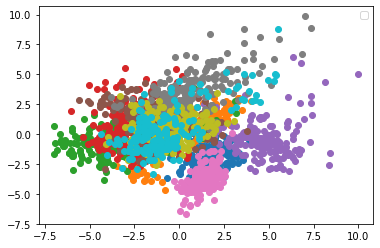

In [119]:
visualize_latent_space_with_label(viz_pca_latent)

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [121]:
rfc = RandomForestClassifier()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=111)

rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.9777777777777777

In [126]:
n_comp_pca= PCA(n_components = 2)
viz_pca_latent = n_comp_pca.fit_transform(scaled_x)

rfc = RandomForestClassifier()

x_train, x_test, y_train, y_test = train_test_split(viz_pca_latent, y, random_state=111)

rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.5577777777777778

In [129]:
n_comp_pca= PCA(n_components = 21)
viz_pca_latent = n_comp_pca.fit_transform(scaled_x)

rfc = RandomForestClassifier()

x_train, x_test, y_train, y_test = train_test_split(viz_pca_latent, y, random_state=111)

rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.9555555555555556